# Project 3 Loan Risk Analysis

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [3]:
# Load loan data
loan_data = pd.read_excel('C:/pandas/Loan Analysis Project/loandataset.xlsx')

# Load customers data
customers_data = pd.read_csv('C:/pandas/Loan Analysis Project/customer_data.csv', sep = ';') # If the separtor of csv file is not ',' 

# Checking Data Quality

In [6]:
loan_data.head()

,loan id,customerid,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,193,C193,1,debt_consolidation,0.0743,178.68,11.461632,1.20,812,16259.04167,50,0.3,0,0,0,0
1,114,C114,1,debt_consolidation,0.0712,64.96,11.608236,0.22,812,16213.00000,50,0.3,0,0,0,0
2,920,C920,1,all_other,0.0800,313.37,10.274672,2.24,792,14100.00000,2751,16.7,0,0,0,0
3,56,C56,1,small_business,0.1059,398.69,11.002100,17.12,747,14008.95833,17214,8.1,2,1,0,0
4,93,C93,1,debt_consolidation,0.0870,383.87,11.918391,4.80,767,13349.95833,61921,39.1,0,0,0,0


In [7]:
customers_data.head()

,id,first_name,last_name,email,gender,city,country
0,C1,Rafaelia,Constable,rconstable0@google.co.jp,Female,Kazanskoye,Russia
1,C2,Rayner,Langhor,rlanghor1@arstechnica.com,Male,Yauca,Peru
2,C3,Felike,Duchesne,fduchesne2@blog.com,Male,Monte Santo de Minas,Brazil
3,C4,Kelli,Winchcomb,kwinchcomb3@tuttocitta.it,Female,Červené Pečky,Czech Republic
4,C5,Timi,Butterley,tbutterley4@jalbum.net,Female,Lorino,Russia


In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan id            999 non-null    int64  
 1   customerid         999 non-null    object 
 2   credit.policy      999 non-null    int64  
 3   purpose            999 non-null    object 
 4   int.rate           999 non-null    float64
 5   installment        999 non-null    float64
 6   log.annual.inc     999 non-null    float64
 7   dti                999 non-null    float64
 8   fico               999 non-null    int64  
 9   days.with.cr.line  999 non-null    float64
 10  revol.bal          999 non-null    int64  
 11  revol.util         999 non-null    float64
 12  inq.last.6mths     999 non-null    int64  
 13  delinq.2yrs        999 non-null    int64  
 14  pub.rec            999 non-null    int64  
 15  not.fully.paid     999 non-null    int64  
dtypes: float64(6), int64(8), o

In [9]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1000 non-null   object
 1   first_name  1000 non-null   object
 2   last_name   1000 non-null   object
 3   email       1000 non-null   object
 4   gender      1000 non-null   object
 5   city        989 non-null    object
 6   country     989 non-null    object
dtypes: object(7)
memory usage: 54.8+ KB


In [10]:
# Joining Data
# Merging dataframes on ID (Same content but different column in 2 tables)
complete_data = pd.merge(loan_data, customers_data, left_on = 'customerid', right_on = 'id')

# Data Cleaning

In [11]:
complete_data.isnull().sum()

loan id               0
customerid            0
credit.policy         0
purpose               0
int.rate              0
installment           0
log.annual.inc        0
dti                   0
fico                  0
days.with.cr.line     0
revol.bal             0
revol.util            0
inq.last.6mths        0
delinq.2yrs           0
pub.rec               0
not.fully.paid        0
id                    0
first_name            0
last_name             0
email                 0
gender                0
city                 11
country              11
dtype: int64

In [12]:
# Remove all the rows with missing data
complete_data = complete_data.dropna()

In [13]:
# Check for duplicated data
complete_data.duplicated().sum()

# Since no duplicate rows, don't need to clean it.

0

# Create FICO Category Based on Criteria

In [14]:
# Create a new function to categorize FICO scores
def categorize_fico(fico_score):
    if fico_score >= 800 and fico_score <= 850:
        return 'Excellent'
    elif fico_score >= 740 and fico_score <= 799:
        return 'Very Good'
    elif fico_score >= 670 and fico_score <= 739:
        return 'Good'
    elif fico_score >= 580 and fico_score <= 669:
        return 'Fair'
    else:
        return 'Poor'
    
complete_data['fico_category'] = complete_data['fico'].apply(categorize_fico)

# Data Visualization

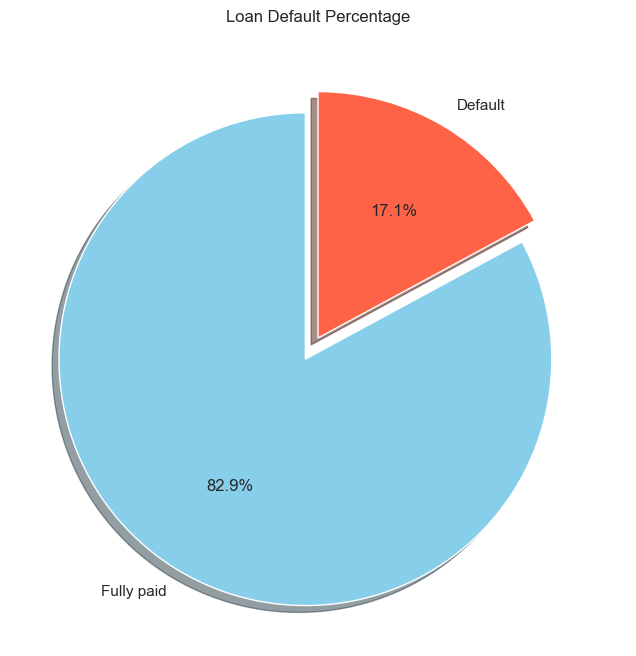

In [15]:
# Create a pie chart to see the percentage of default and fully paid
sns.set_theme(style = 'darkgrid')

default_percentage = complete_data.groupby('not.fully.paid')['id'].count().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(default_percentage['id'], labels=['Fully paid','Default'], autopct='%1.1f%%', startangle=90, colors=['#87CEEB', '#FF6347'], explode=(0.1,0), shadow=True)
plt.title('Loan Default Percentage')
plt.show()

```
In our dataset, the majority of borrowers have repaid their loans successfully, with only 17% defaulting.
```

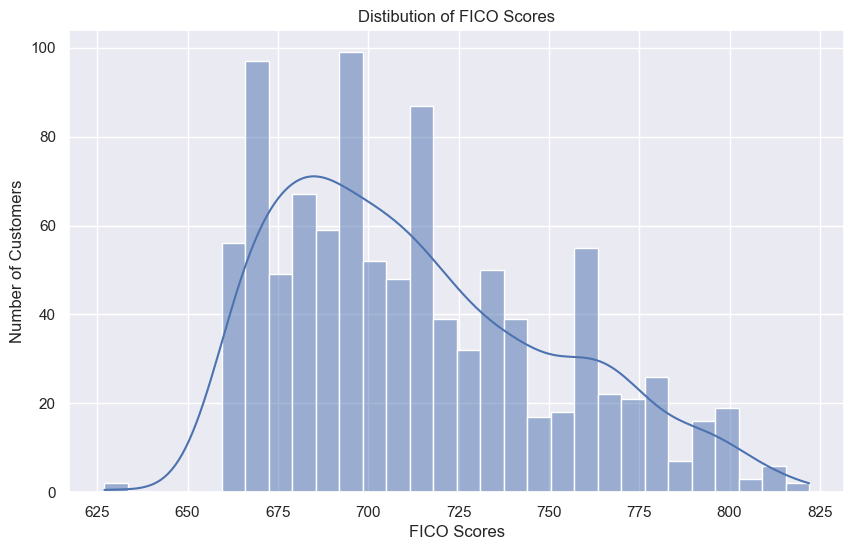

In [28]:
# Distribution of FICO scores

plt.figure(figsize = (10,6))
sns.histplot(complete_data['fico'], bins = 30, kde = True)
plt.title('Distibution of FICO Scores')
plt.xlabel('FICO Scores')
plt.ylabel('Number of Customers')
plt.show()

```
The distribution is right skewed, indicating that only a small number of borrowers have FICO scores above 775, and most borrowers have scores between 675 and 725. 
```

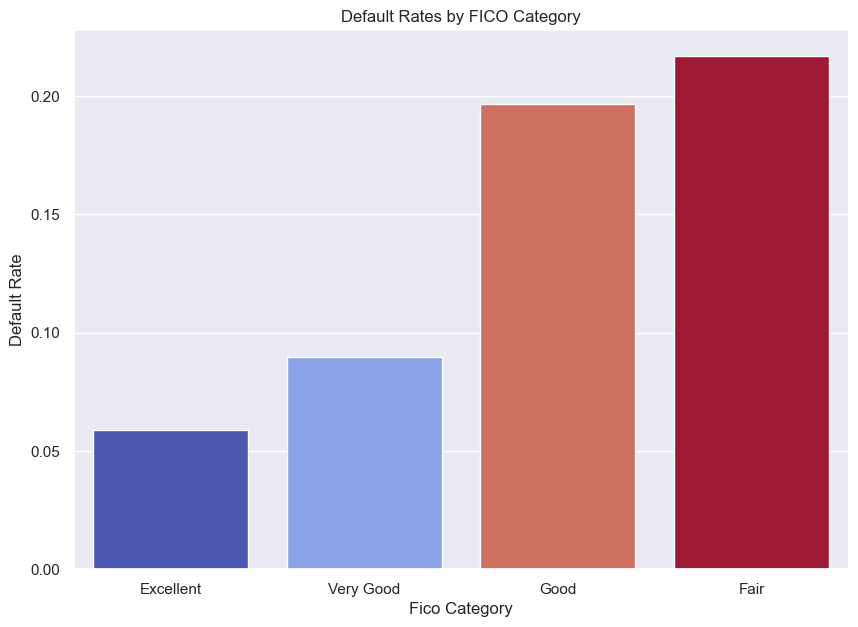

In [17]:
# Create a bar chart to see the default rates by each FICO category
default_rates = complete_data.groupby('fico_category')['not.fully.paid'].mean().reset_index()

order = ['Excellent', 'Very Good', 'Good', 'Fair']
plt.figure(figsize = (10,7))
sns.barplot(x = 'fico_category', y = 'not.fully.paid', data = default_rates, order = order,hue = 'not.fully.paid', palette = 'coolwarm', legend = False)
plt.xlabel('Fico Category')
plt.ylabel('Default Rate')
plt.title('Default Rates by FICO Category')
plt.show();

```
Our analysis shows that most loans are for debt consolidation, with a relatively low default rate. In contrast, there are not many loans for the purposes of small business and educational, but the risk of default is high. Therefore, additional risk assessments should be implemented for borrowers with these loan purposes.
```

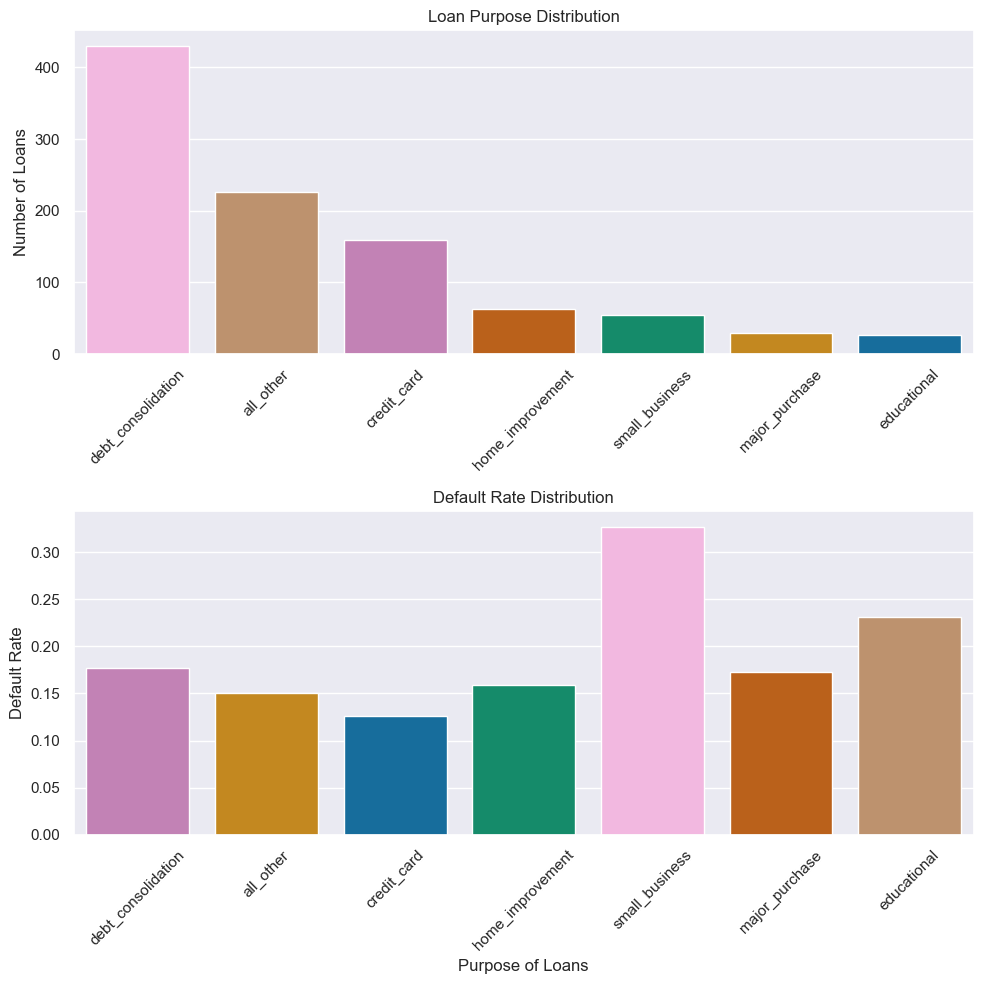

In [18]:
# Create a subplot to see the nubmer of loans and default rate by each loan purpose 
purpose_not_paid = complete_data.groupby('purpose')[['id', 'not.fully.paid']].agg({'id': 'count', 'not.fully.paid': 'mean'}).reset_index()

purpose_not_paid.columns = ['purpose', 'Total Loan', 'not fully paid']

purpose_not_paid = purpose_not_paid.sort_values(by = 'Total Loan', ascending = False)

fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols =1, figsize = (10,10))
sns.barplot(x = 'purpose', y = 'Total Loan', data = purpose_not_paid, hue = 'Total Loan', palette = 'colorblind', legend = False, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Number of Loans')
ax1.set_title('Loan Purpose Distribution')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation = 45)

sns.barplot(x = 'purpose', y= 'not fully paid', data = purpose_not_paid, hue = 'not fully paid', palette = 'colorblind', legend = False, ax=ax2)
ax2.set_xlabel('Purpose of Loans')
ax2.set_ylabel('Default Rate')
ax2.set_title('Default Rate Distribution')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation = 45)
plt.tight_layout()
plt.show()

```
FICO scores have an inverse relationship with default rates, high-risk borrowers may need stricter approval or collateral.
```

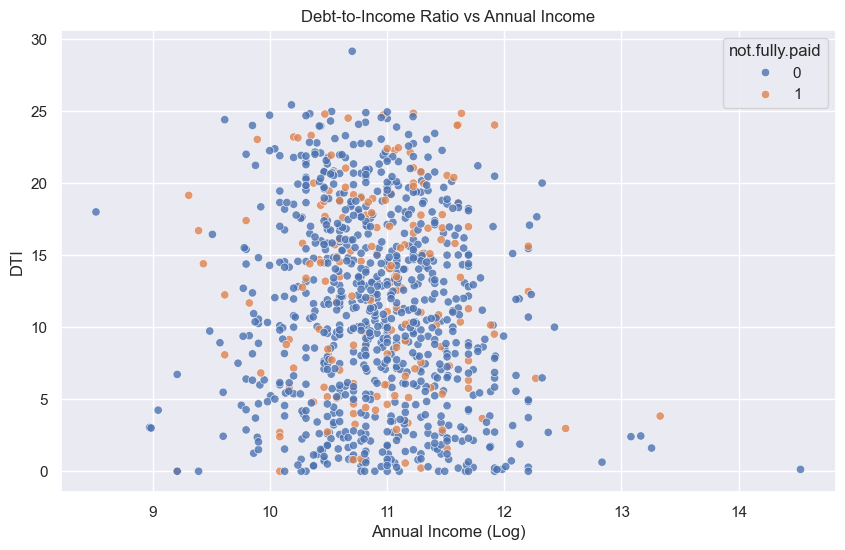

In [27]:
# Create a scatterplot for dti vs annual income(log)
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'log.annual.inc', y = 'dti', hue='not.fully.paid', data = complete_data, alpha = 0.8)
plt.title('Debt-to-Income Ratio vs Annual Income')
plt.xlabel('Annual Income (Log)')
plt.ylabel('DTI')
plt.show()

```
The default cases are widely dispersed, indicating no strong direct relationship between income and default risk. Defaults occur across all income levels, but more defaults seem to appear in the DTI range of 5-20. This suggests that factors other than income, such as debt-to-income ratio, may play a more significant role in default risk.
```

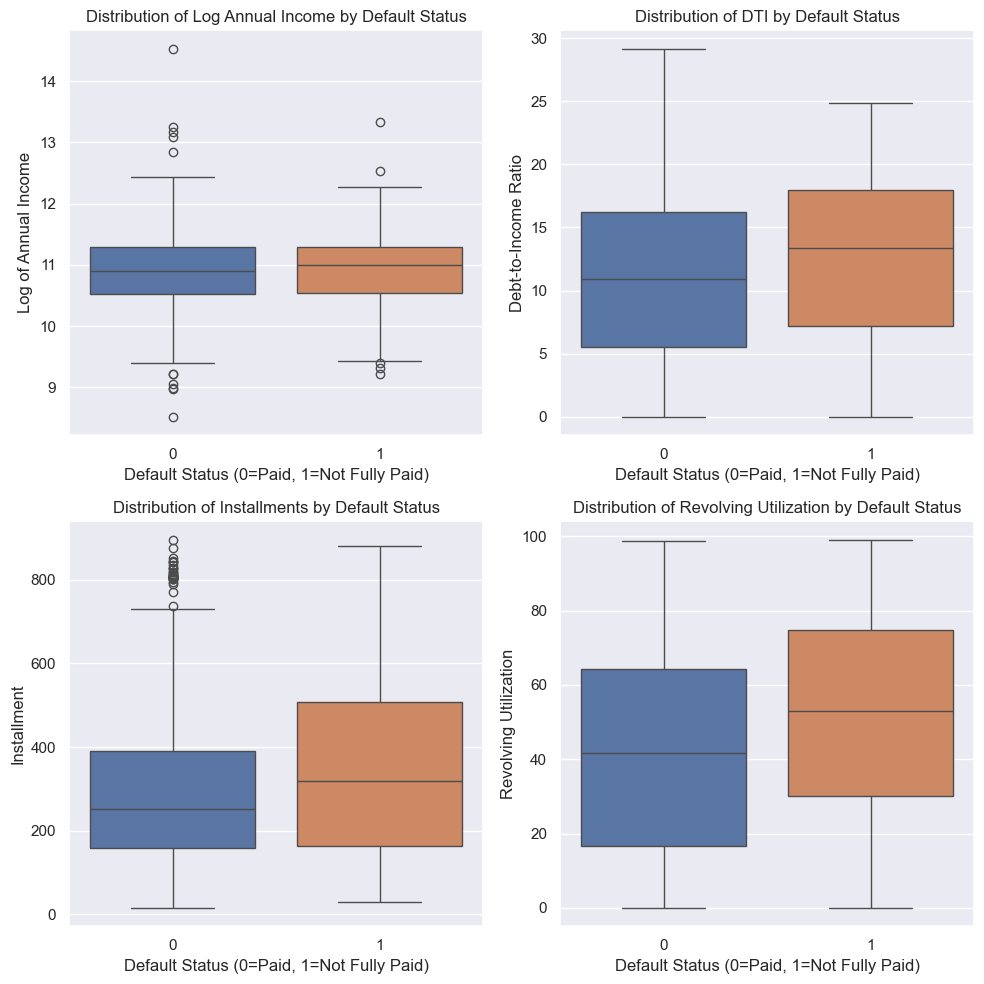

In [21]:
# Create a subplots to see the relationship between annual income, DTI, installments, revolving utilization vs. default status
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

sns.boxplot(x='not.fully.paid', y='log.annual.inc', data=complete_data, hue = 'not.fully.paid', legend = False, ax = axs[0,0])
axs[0,0].set_title('Distribution of Log Annual Income by Default Status')
axs[0,0].set_xlabel('Default Status (0=Paid, 1=Not Fully Paid)')
axs[0,0].set_ylabel('Log of Annual Income')


sns.boxplot(x = 'not.fully.paid', y = 'dti', data = complete_data, hue = 'not.fully.paid', legend = False, ax = axs[0,1])
axs[0,1].set_title('Distribution of DTI by Default Status')
axs[0,1].set_xlabel('Default Status (0=Paid, 1=Not Fully Paid)')
axs[0,1].set_ylabel('Debt-to-Income Ratio')


sns.boxplot(x='not.fully.paid', y='installment', data=complete_data, hue = 'not.fully.paid', legend = False, ax=axs[1,0])
axs[1,0].set_title('Distribution of Installments by Default Status')
axs[1,0].set_xlabel('Default Status (0=Paid, 1=Not Fully Paid)')
axs[1,0].set_ylabel('Installment')


sns.boxplot(x='not.fully.paid', y='revol.util', data=complete_data, hue = 'not.fully.paid', legend = False, ax=axs[1,1])
axs[1,1].set_title('Distribution of Revolving Utilization by Default Status')
axs[1,1].set_xlabel('Default Status (0=Paid, 1=Not Fully Paid)')
axs[1,1].set_ylabel('Revolving Utilization')
plt.tight_layout()
plt.show()


```
Log annual income has little effect on default risk, as the median values are similar for both groups. However, a higher DTI ratio, as well as higher installment amounts and revolving utilization, are more likely to increase the default rate. Therefore, when making predictions we should should focus DTI ratio, installment amounts, and revolving utilization.
```

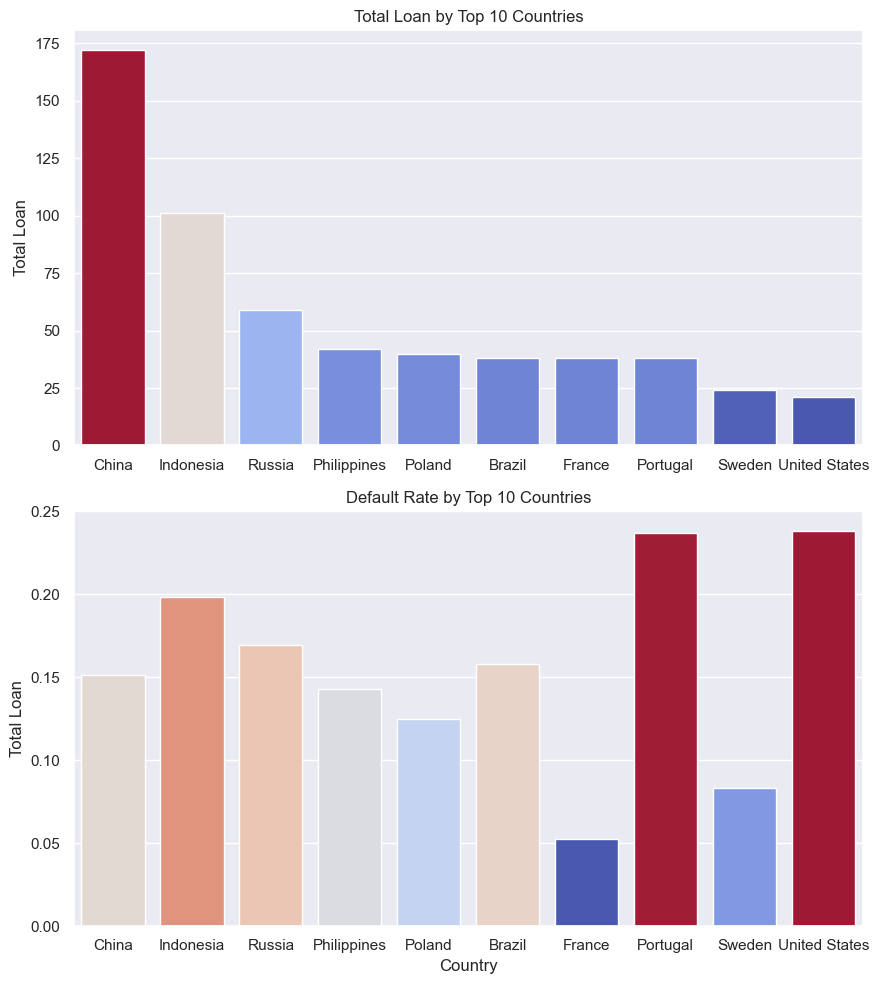

In [26]:
# Create a subplot to see the total loan and default rate by top 10 countries
country_default = complete_data.groupby('country')[['id', 'not.fully.paid']].agg({'id': 'count', 'not.fully.paid': 'mean'}).reset_index()
country_default.columns = ['Country', 'Total Loan', 'Default Rate']

top_10_country = country_default.sort_values(by = 'Total Loan', ascending = False).head(10)['Country']

country_plot = country_default[country_default['Country'].isin(top_10_country)]

country_plot = country_plot.sort_values(by = 'Total Loan', ascending = False)

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(9, 10))
sns.barplot(x = 'Country', y = 'Total Loan', data = country_plot, hue = 'Total Loan', palette= 'coolwarm', legend = False, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Total Loan')
ax1.set_title('Total Loan by Top 10 Countries')

sns.barplot(x = 'Country', y = 'Default Rate', data = country_plot, hue = 'Default Rate', palette = 'coolwarm', legend = False, ax=ax2)
ax2.set_xlabel('Country')
ax2.set_ylabel('Total Loan')
ax2.set_title('Default Rate by Top 10 Countries')
plt.tight_layout()
plt.show();

```
China stands out with high loan volumes and low default rates, suggesting a strong and stable credit environment, making it a prime market for loan expansion. Although France has a smaller loan volume, it has a lower default rate than other countries with similar loan volumes, making it a strong candidate for loan expansion. In high default countries like Portugal, the U.S., and Indonesia, stricter approval or higher interest rates are recommended.
```